# Analyzing networks in Python
Some of the codes are adapted from https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience, Chapter 1-2.

# Import modules

*   networkx: "Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks." https://networkx.org/
*   pandas: tabular data (spreadsheet) manipulation
*   matplotlib: visualizing data
*   urlib: URL handling modules
*   json: a standard data interchange format https://en.wikipedia.org/wiki/JSON




In [ ]:
import networkx as nx

import pandas as pd
import matplotlib.pyplot as plt
import urllib, json

## Loading a Network
### House Graph example
https://networkx.org/documentation/stable/auto_examples/drawing/plot_house_with_colors.html

In [ ]:
HG = nx.house_graph()

In [ ]:
## Nodes
HG.nodes()

NodeView((0, 1, 2, 3, 4))

In [ ]:
len(HG.nodes()) == HG.number_of_nodes()

True

In [ ]:
## Edges
HG.edges()

EdgeView([(0, 1), (0, 2), (1, 3), (2, 3), (2, 4), (3, 4)])

In [ ]:
len(HG.edges()) == HG.number_of_edges()

True

## Visualization example

https://networkx.org/documentation/stable/auto_examples/drawing/plot_house_with_colors.html

You should always be careful that, unless specific layouts are used, the relative position of nodes does not convey any information about the structure of the graph.

In [ ]:
# draw the graph
?nx.draw
# nx.draw(HG, with_labels=True)

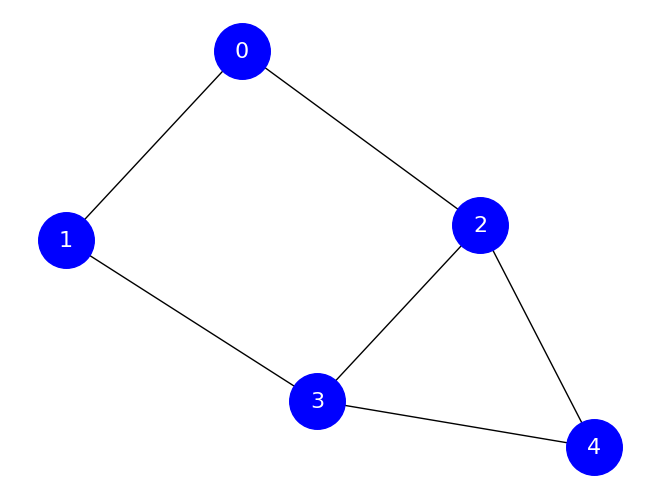

In [ ]:
# Try running multiple times
# By default, the layout is randomized

nx.draw(HG,
        with_labels=True,
        node_color='blue',
        node_size=1600,
        font_color='white',
        font_size=16,
        )

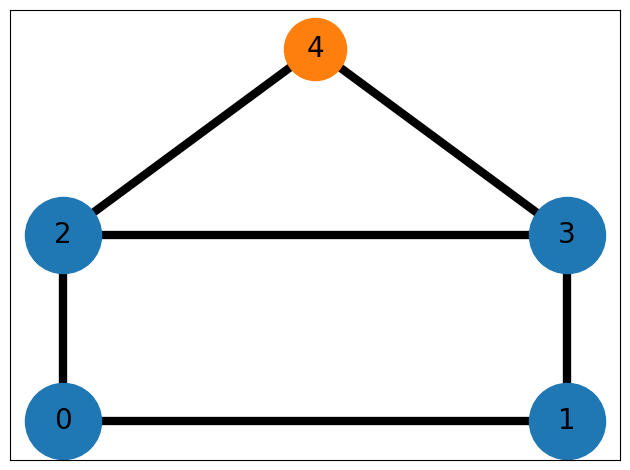

In [ ]:
pos = {0: (0, 0), 1: (1, 0), 2: (0, 1), 3: (1, 1), 4: (0.5, 2.0)}
nx.draw_networkx_nodes(
    HG, pos, node_size=3000, nodelist=[0, 1, 2, 3], node_color="tab:blue"
)
nx.draw_networkx_nodes(HG, pos, node_size=2000, nodelist=[4], node_color="tab:orange")
nx.draw_networkx_edges(HG, pos, alpha=1, width=6)
nx.draw_networkx_labels(HG, pos, font_size=20)

plt.tight_layout()

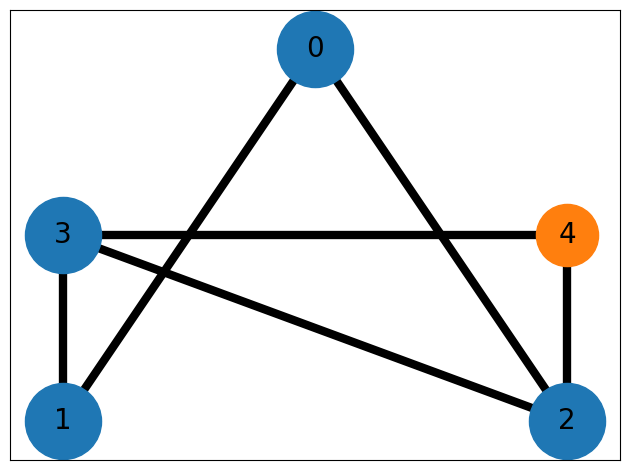

In [ ]:
pos = {1: (0, 0), 2: (1, 0), 3: (0, 1), 4: (1, 1), 0: (0.5, 2.0)}
nx.draw_networkx_nodes(
    HG, pos, node_size=3000, nodelist=[0, 1, 2, 3], node_color="tab:blue"
)
nx.draw_networkx_nodes(HG, pos, node_size=2000, nodelist=[4], node_color="tab:orange")
nx.draw_networkx_edges(HG, pos, alpha=1, width=6)
nx.draw_networkx_labels(HG, pos, font_size=20)

plt.tight_layout()

In [ ]:
HG.degree(0)

2

# Directed graphs

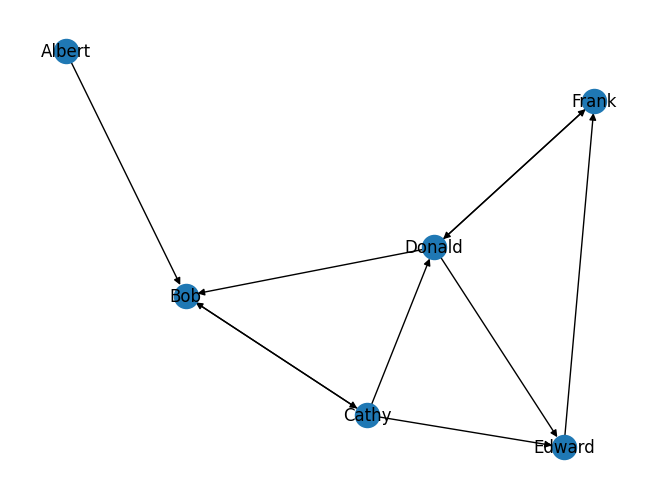

In [ ]:
# Try running multiple times
# By default, the layout is randomized

D = nx.DiGraph()

D.add_edges_from([('Albert','Bob'),('Bob', 'Cathy'),('Cathy','Bob'),('Cathy','Donald'),
 ('Cathy', 'Edward'),('Donald','Edward'),('Donald','Frank'),('Edward','Frank'),('Frank','Donald'),('Donald','Bob')])

nx.draw(D, with_labels=True)

In [ ]:
D.has_edge('Albert','Bob'), D.has_edge('Bob','Albert'),

(True, False)

In [ ]:
D.in_degree('Bob')

3

In [ ]:
D.out_degree('Bob')

1

# Les Miserables Graph
*   Nodes: Each of the characters in Les Miserables.
*   Edges: Pairs of characters co-appearing in the same chapter(s).  
https://github.com/plotly/datasets

In [ ]:
lemis_url = 'https://raw.githubusercontent.com/plotly/datasets/master/miserables.json'
with urllib.request.urlopen(lemis_url) as url:
    raw_data = json.loads(url.read().decode())

In [ ]:
raw_data

{'nodes': [{'name': 'Myriel', 'group': 1},
  {'name': 'Napoleon', 'group': 1},
  {'name': 'Mlle.Baptistine', 'group': 1},
  {'name': 'Mme.Magloire', 'group': 1},
  {'name': 'CountessdeLo', 'group': 1},
  {'name': 'Geborand', 'group': 1},
  {'name': 'Champtercier', 'group': 1},
  {'name': 'Cravatte', 'group': 1},
  {'name': 'Count', 'group': 1},
  {'name': 'OldMan', 'group': 1},
  {'name': 'Labarre', 'group': 2},
  {'name': 'Valjean', 'group': 2},
  {'name': 'Marguerite', 'group': 3},
  {'name': 'Mme.deR', 'group': 2},
  {'name': 'Isabeau', 'group': 2},
  {'name': 'Gervais', 'group': 2},
  {'name': 'Tholomyes', 'group': 3},
  {'name': 'Listolier', 'group': 3},
  {'name': 'Fameuil', 'group': 3},
  {'name': 'Blacheville', 'group': 3},
  {'name': 'Favourite', 'group': 3},
  {'name': 'Dahlia', 'group': 3},
  {'name': 'Zephine', 'group': 3},
  {'name': 'Fantine', 'group': 3},
  {'name': 'Mme.Thenardier', 'group': 4},
  {'name': 'Thenardier', 'group': 4},
  {'name': 'Cosette', 'group': 5},
  

In [ ]:
nodes = raw_data['nodes']
edges = raw_data['links']

In [ ]:
nodes[:5], edges[:5]

([{'name': 'Myriel', 'group': 1},
  {'name': 'Napoleon', 'group': 1},
  {'name': 'Mlle.Baptistine', 'group': 1},
  {'name': 'Mme.Magloire', 'group': 1},
  {'name': 'CountessdeLo', 'group': 1}],
 [{'source': 1, 'target': 0, 'value': 1},
  {'source': 2, 'target': 0, 'value': 8},
  {'source': 3, 'target': 0, 'value': 10},
  {'source': 3, 'target': 2, 'value': 6},
  {'source': 4, 'target': 0, 'value': 1}])

In [ ]:
node_list = [node['name'] for node in nodes]
node_list

['Myriel',
 'Napoleon',
 'Mlle.Baptistine',
 'Mme.Magloire',
 'CountessdeLo',
 'Geborand',
 'Champtercier',
 'Cravatte',
 'Count',
 'OldMan',
 'Labarre',
 'Valjean',
 'Marguerite',
 'Mme.deR',
 'Isabeau',
 'Gervais',
 'Tholomyes',
 'Listolier',
 'Fameuil',
 'Blacheville',
 'Favourite',
 'Dahlia',
 'Zephine',
 'Fantine',
 'Mme.Thenardier',
 'Thenardier',
 'Cosette',
 'Javert',
 'Fauchelevent',
 'Bamatabois',
 'Perpetue',
 'Simplice',
 'Scaufflaire',
 'Woman1',
 'Judge',
 'Champmathieu',
 'Brevet',
 'Chenildieu',
 'Cochepaille',
 'Pontmercy',
 'Boulatruelle',
 'Eponine',
 'Anzelma',
 'Woman2',
 'MotherInnocent',
 'Gribier',
 'Jondrette',
 'Mme.Burgon',
 'Gavroche',
 'Gillenormand',
 'Magnon',
 'Mlle.Gillenormand',
 'Mme.Pontmercy',
 'Mlle.Vaubois',
 'Lt.Gillenormand',
 'Marius',
 'BaronessT',
 'Mabeuf',
 'Enjolras',
 'Combeferre',
 'Prouvaire',
 'Feuilly',
 'Courfeyrac',
 'Bahorel',
 'Bossuet',
 'Joly',
 'Grantaire',
 'MotherPlutarch',
 'Gueulemer',
 'Babet',
 'Claquesous',
 'Montparnass

In [ ]:
edge_list = [(row["source"], row["target"]) for row in edges]
edge_list

[(1, 0),
 (2, 0),
 (3, 0),
 (3, 2),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 0),
 (11, 10),
 (11, 3),
 (11, 2),
 (11, 0),
 (12, 11),
 (13, 11),
 (14, 11),
 (15, 11),
 (17, 16),
 (18, 16),
 (18, 17),
 (19, 16),
 (19, 17),
 (19, 18),
 (20, 16),
 (20, 17),
 (20, 18),
 (20, 19),
 (21, 16),
 (21, 17),
 (21, 18),
 (21, 19),
 (21, 20),
 (22, 16),
 (22, 17),
 (22, 18),
 (22, 19),
 (22, 20),
 (22, 21),
 (23, 16),
 (23, 17),
 (23, 18),
 (23, 19),
 (23, 20),
 (23, 21),
 (23, 22),
 (23, 12),
 (23, 11),
 (24, 23),
 (24, 11),
 (25, 24),
 (25, 23),
 (25, 11),
 (26, 24),
 (26, 11),
 (26, 16),
 (26, 25),
 (27, 11),
 (27, 23),
 (27, 25),
 (27, 24),
 (27, 26),
 (28, 11),
 (28, 27),
 (29, 23),
 (29, 27),
 (29, 11),
 (30, 23),
 (31, 30),
 (31, 11),
 (31, 23),
 (31, 27),
 (32, 11),
 (33, 11),
 (33, 27),
 (34, 11),
 (34, 29),
 (35, 11),
 (35, 34),
 (35, 29),
 (36, 34),
 (36, 35),
 (36, 11),
 (36, 29),
 (37, 34),
 (37, 35),
 (37, 36),
 (37, 11),
 (37, 29),
 (38, 34),
 (38, 35),
 (38, 36),
 (38, 37),


In [ ]:
edge_list = [(node_list[a], node_list[b]) for a, b in edge_list]
edge_list

[('Napoleon', 'Myriel'),
 ('Mlle.Baptistine', 'Myriel'),
 ('Mme.Magloire', 'Myriel'),
 ('Mme.Magloire', 'Mlle.Baptistine'),
 ('CountessdeLo', 'Myriel'),
 ('Geborand', 'Myriel'),
 ('Champtercier', 'Myriel'),
 ('Cravatte', 'Myriel'),
 ('Count', 'Myriel'),
 ('OldMan', 'Myriel'),
 ('Valjean', 'Labarre'),
 ('Valjean', 'Mme.Magloire'),
 ('Valjean', 'Mlle.Baptistine'),
 ('Valjean', 'Myriel'),
 ('Marguerite', 'Valjean'),
 ('Mme.deR', 'Valjean'),
 ('Isabeau', 'Valjean'),
 ('Gervais', 'Valjean'),
 ('Listolier', 'Tholomyes'),
 ('Fameuil', 'Tholomyes'),
 ('Fameuil', 'Listolier'),
 ('Blacheville', 'Tholomyes'),
 ('Blacheville', 'Listolier'),
 ('Blacheville', 'Fameuil'),
 ('Favourite', 'Tholomyes'),
 ('Favourite', 'Listolier'),
 ('Favourite', 'Fameuil'),
 ('Favourite', 'Blacheville'),
 ('Dahlia', 'Tholomyes'),
 ('Dahlia', 'Listolier'),
 ('Dahlia', 'Fameuil'),
 ('Dahlia', 'Blacheville'),
 ('Dahlia', 'Favourite'),
 ('Zephine', 'Tholomyes'),
 ('Zephine', 'Listolier'),
 ('Zephine', 'Fameuil'),
 ('Zephin

### Create a networkx object with the information above
https://networkx.org/documentation/networkx-1.0/tutorial/tutorial.html

In [ ]:
LM_G = nx.Graph()
LM_G.add_edges_from(edge_list)

In [ ]:
LM_G.number_of_nodes()

77

In [ ]:
LM_G.degree('Valjean')

36

In [ ]:
[neighbor for neighbor in LM_G.neighbors('Valjean')]

['Labarre',
 'Mme.Magloire',
 'Mlle.Baptistine',
 'Myriel',
 'Marguerite',
 'Mme.deR',
 'Isabeau',
 'Gervais',
 'Fantine',
 'Mme.Thenardier',
 'Thenardier',
 'Cosette',
 'Javert',
 'Fauchelevent',
 'Bamatabois',
 'Simplice',
 'Scaufflaire',
 'Woman1',
 'Judge',
 'Champmathieu',
 'Brevet',
 'Chenildieu',
 'Cochepaille',
 'Woman2',
 'MotherInnocent',
 'Gavroche',
 'Gillenormand',
 'Mlle.Gillenormand',
 'Marius',
 'Enjolras',
 'Bossuet',
 'Gueulemer',
 'Babet',
 'Claquesous',
 'Montparnasse',
 'Toussaint']

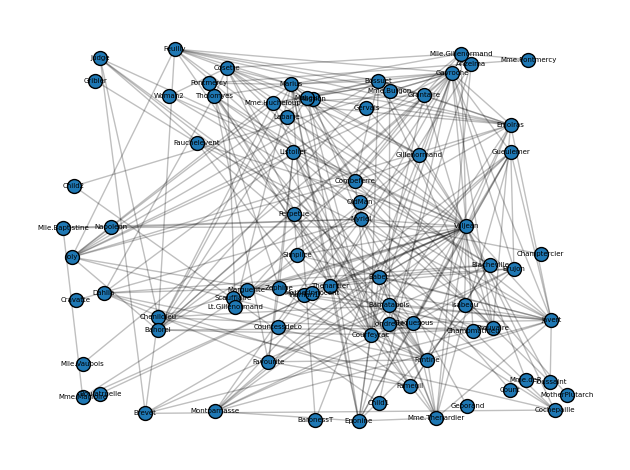

In [ ]:
pos = nx.random_layout(LM_G)
nx.draw_networkx_edges(LM_G, pos, alpha=0.25, width=1)
nx.draw_networkx_nodes(LM_G, pos, node_size=100).set_edgecolor('black')

# Add labels to the nodes
labels = {node: str(node) for node in LM_G.nodes()}  # Replace str(node) with your actual labels
nx.draw_networkx_labels(LM_G, pos, labels, font_size=5, font_color='black')

plt.tight_layout()
plt.axis("off")
plt.show()

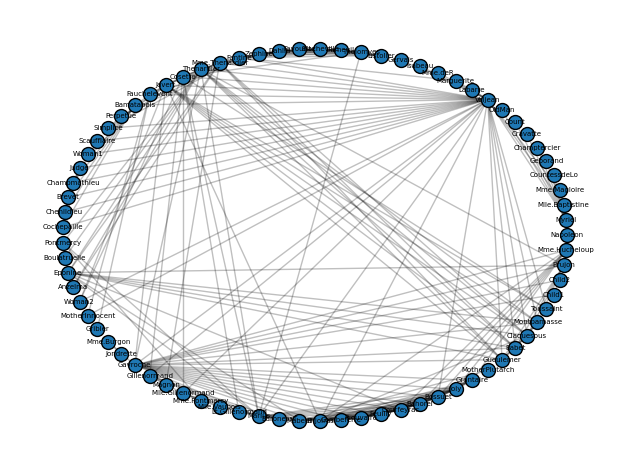

In [ ]:
pos = nx.circular_layout(LM_G)
nx.draw_networkx_edges(LM_G, pos, alpha=0.25, width=1)
nx.draw_networkx_nodes(LM_G, pos, node_size=100).set_edgecolor('black')

# Add labels to the nodes
labels = {node: str(node) for node in LM_G.nodes()}  # Replace str(node) with your actual labels
nx.draw_networkx_labels(LM_G, pos, labels, font_size=5, font_color='black')

plt.tight_layout()
plt.axis("off")
plt.show()

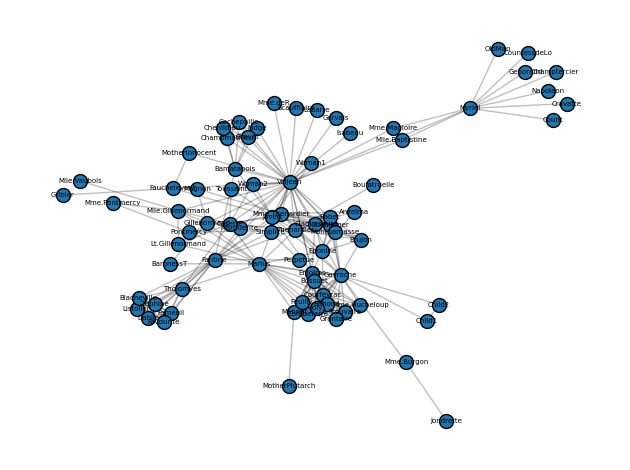

In [ ]:
pos = nx.spring_layout(LM_G, seed=200)
nx.draw_networkx_edges(LM_G, pos, alpha=0.25, width=1)
nx.draw_networkx_nodes(LM_G, pos, node_size=100).set_edgecolor('black')

# Add labels to the nodes
labels = {node: str(node) for node in LM_G.nodes()}  # Replace str(node) with your actual labels
nx.draw_networkx_labels(LM_G, pos, labels, font_size=5, font_color='black')

plt.tight_layout()
plt.axis("off")
plt.show()

In [ ]:
df = pd.DataFrame( nx.degree(LM_G), columns=['node', 'degree'] )
df.sort_values('degree', ascending=False)

,node,degree
10,Valjean,36
48,Gavroche,22
55,Marius,19
27,Javert,17
25,Thenardier,16
...,...,...
13,Mme.deR,1
53,Mlle.Vaubois,1
45,Gribier,1
47,Jondrette,1


# On your Own (1):
By running below code, you will get a NetworkX object KC_G that contains the network collected from the members of a university karate club by Wayne Zachary. Zachary (1977) used these data and an information flow model of network conflict resolution to explain the split-up of this group following disputes among the members.
- https://networkx.org/documentation/stable/auto_examples/graph/plot_karate_club.html
- http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm
- Zachary W. (1977). An information flow model for conflict and fission in small groups. Journal of Anthropological Research, 33, 452-473.


(1) How many nodes and edges are there?  
(2) What is the degree of a node that has the highest degree?  
(3) Visualize the network. How does it look compared to Les Miserables graph?  

In [ ]:
KC_G = nx.karate_club_graph()

In [ ]:
# (1)
KC_G.number_of_nodes(), KC_G.number_of_edges()

(34, 78)

In [ ]:
# (2)
sorted([KC_G.degree(node) for node in KC_G.nodes()],reverse=True)[0]

17

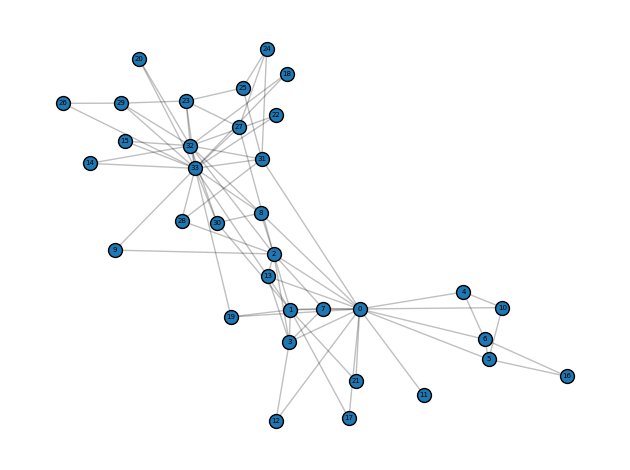

In [ ]:
# (3)
pos = nx.spring_layout(KC_G, seed=200)
nx.draw_networkx_edges(KC_G, pos, alpha=0.25, width=1)
nx.draw_networkx_nodes(KC_G, pos, node_size=100).set_edgecolor('black')

# Add labels to the nodes
labels = {node: str(node) for node in KC_G.nodes()}  # Replace str(node) with your actual labels
nx.draw_networkx_labels(KC_G, pos, labels, font_size=5, font_color='black')

plt.tight_layout()
plt.axis("off")
plt.show()

# On your Own (2):
The code below creates three different graphs in NetworkX, each generated by a different random graph algorithm. Three networks have the same number of nodes and almost the same amount of edges.

Answer the following questions:

(1) How many nodes and edges are in each network?  
(2) What is the degree of a node that has the highest degree in each network?  
(3) Visualize the three networks. Do they look different from one another, despite having almost the same number of nodes and edges?  

In [ ]:
ER = nx.erdos_renyi_graph(40, .06, seed=42)

In [ ]:
WS = nx.watts_strogatz_graph(40, 2, 0.2, seed=42)

In [ ]:
BA = nx.barabasi_albert_graph(40, 1, seed=42)